# Simple Linear Regression

We will show how to use linear regression to find a best fit line through an artificial 2D scatter plot generated from a line with Gaussian noise added.

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from mltools.glm import LinearModel, LASSO, Ridge
from mltools.optimization import GradientDescent
from mltools.visualization import abline

In [2]:
# Set NumPy random number generator seed for replicability
np.random.seed(100)

## Create Some Artificial Data

In [3]:
n = 100
slope = 3
intercept = 2

x = np.random.uniform(0, 10, n)
y = slope * x + intercept + np.random.normal(0, 10, n)

## The Ordinary Least Squares Regression Model

### Fitting the Model

In [4]:
%time
model = LinearModel().fit(x, y)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


### Plotting the Fit

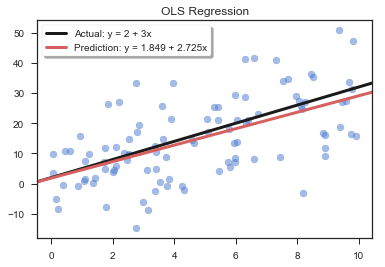

In [5]:
# Get intercept (a) and slope (b) of model
a, b = model.coef

# Plot the regression line
plt.figure()
plt.scatter(x, y, c="b", alpha=0.5)
abline(intercept, slope, lw=3, c="k", label=f"Actual: y = {intercept} + {slope}x")
abline(a, b, lw=3, c="r", label=f"Prediction: y = {a:.3f} + {b:.3f}x")
plt.title("OLS Regression")
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

### Mean Squared Error

To evaluate this model's performance, we compute its *mean squared error* on the data set:
$$
\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^n \left(y_i - \widehat{y}_i\right)^2.
$$
Here $n$ is the number of observations, $y_i$ is the $i$th observed value, and $\widehat{y}_i$ is the least squares estimate corresponding to the $i$th data point.
A good regressor achieves an MLE close to zero.

In [6]:
y_true = slope * x + intercept
y_pred = model.predict(x)
mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse:.5f}")

MSE: 2.74269


## Alternative: The Ridge ($L^2$) Regression Model

### Fitting the Model

In [7]:
%time
gd=GradientDescent(iterations=10000, rate=0.01)
model = Ridge().fit(x, y, optimizer=gd)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs


### Plotting the Fit

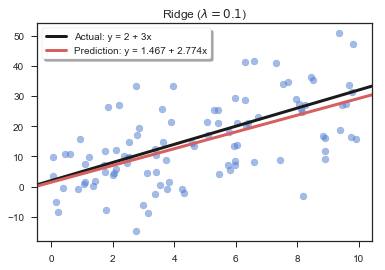

In [8]:
# Get intercept (a) and slope (b) of model
a, b = model.coef

# Plot the regression line
plt.figure()
plt.scatter(x, y, c="b", alpha=0.5)
abline(intercept, slope, lw=3, c="k", label=f"Actual: y = {intercept} + {slope}x")
abline(a, b, lw=3, c="r", label=f"Prediction: y = {a:.3f} + {b:.3f}x")
plt.title(f"Ridge ($\lambda={model.penalty}$)")
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

## Alternative: The LASSO ($L^1$) Regression Model

### Fitting the Model

In [9]:
%time
gd=GradientDescent(iterations=10000, rate=0.01)
model = LASSO().fit(x, y, optimizer=gd)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


### Plotting the Fit

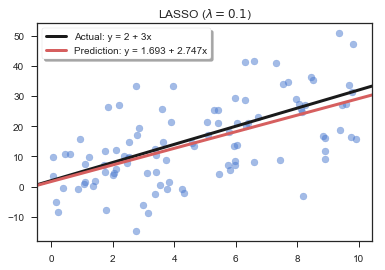

In [10]:
# Get intercept (a) and slope (b) of model
a, b = model.coef

# Plot the regression line
plt.figure()
plt.scatter(x, y, c="b", alpha=0.5)
abline(intercept, slope, lw=3, c="k", label=f"Actual: y = {intercept} + {slope}x")
abline(a, b, lw=3, c="r", label=f"Prediction: y = {a:.3f} + {b:.3f}x")
plt.title(f"LASSO ($\lambda={model.penalty}$)")
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()